In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import imageio,os
%matplotlib inline
from numpy import pi

In [2]:
QrC1 = QuantumRegister(1, 'coin1')
QrS1= QuantumRegister(2, 'space1')
Help1=QuantumRegister(1,'help1')
QrC2 = QuantumRegister(1, 'coin2')
QrS2= QuantumRegister(2, 'space2')
Help2=QuantumRegister(1,'help2')

Cr = ClassicalRegister(4)

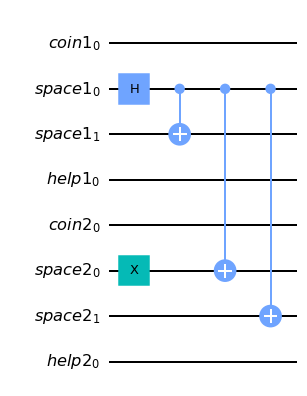

In [3]:
#this part of circuit make the two walkingspace of electron entangle
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='entangle')
qc.h(1)
qc.x(5)
qc.cx(1,2)
qc.cx(1,5)
qc.cx(1,6)
qc.draw('mpl')

C:\Users\willy\AppData\Local\Temp/ipykernel_1752/1950713879.py:3: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])


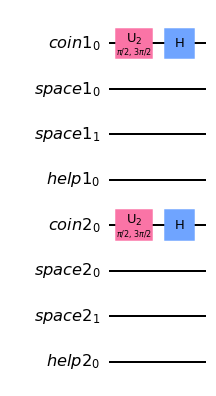

In [4]:
#to set the coin *the U2 gate is used to modify initial state we will only execute once in the beginning
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='coin set')
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC2[0])
qc.h((0,4))
qc.draw('mpl')

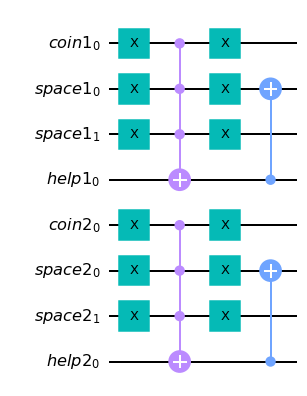

In [5]:
#this part of circuit is designed to prevent the situation while the coin is 0 and the electron is in 00 
#helpqubit is created to mark the situation mention above 
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='sit00')
qc.x((0,1,2,4,5,6))
qc.mcx([0,1,2],3)  
qc.mcx([4,5,6],7)
qc.x((0,1,2,4,5,6))
qc.cx(3,1)
qc.cx(7,5)
qc.draw('mpl')

In [6]:
situation00=qc.to_gate()

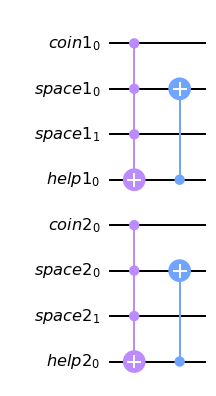

In [7]:
#this part of circuit is designed to prevent the situation while the coin is 1 and the electron is in 11 
#helpqubit is created to mark the situation mention above 
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='sit11')
qc.mcx([0,1,2],3)
qc.mcx([4,5,6],7)
qc.cx(3,1)
qc.cx(7,5)
qc.draw('mpl')

In [8]:
situation11=qc.to_gate()

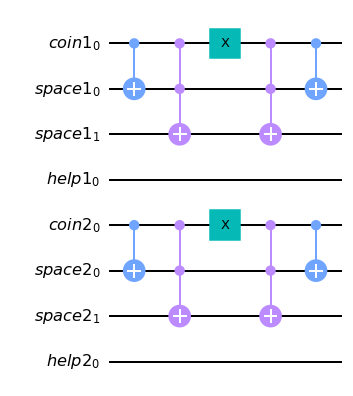

In [9]:
#this part of circuit implement the 'walk' section(if coin is 1 then walk forward,walk backward if coin is 0)
qc=QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,name='walker')
qc.cx(0,1)
qc.ccx(0,1,2)
qc.cx(4,5)
qc.ccx(4,5,6)
qc.x((0,4))
qc.ccx(0,1,2)
qc.cx(0,1)
qc.ccx(4,5,6)
qc.cx(4,5)
qc.draw('mpl')

In [10]:
walker=qc.to_gate()

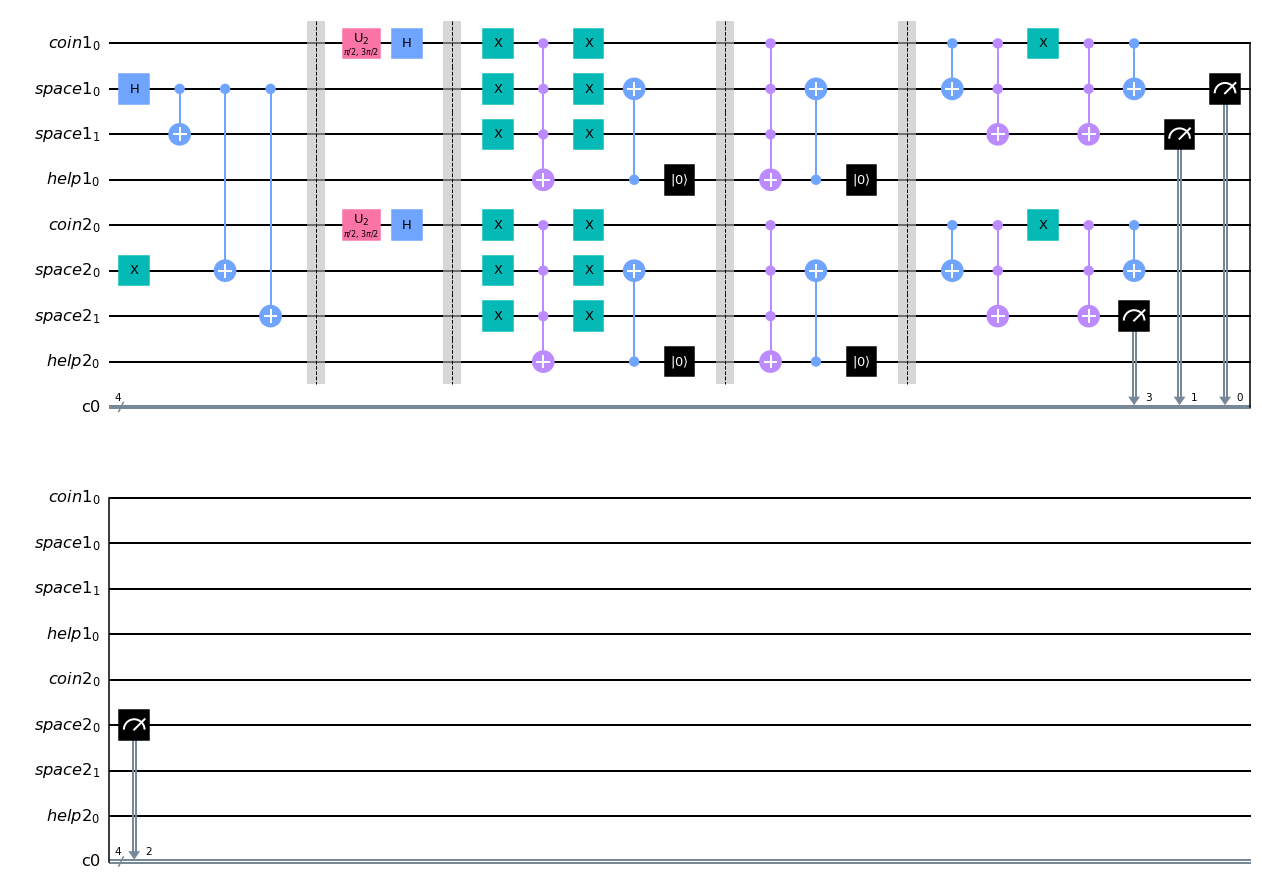

In [12]:
#all circuit view
from qiskit.circuit.library.standard_gates import HGate
qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
qc.h(1)
qc.x(5)
qc.cx(1,2)
qc.cx(1,5)
qc.cx(1,6)
qc.barrier()
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])
qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC2[0])
qc.h((0,4))
qc.barrier()
qc.x((0,1,2,4,5,6))
qc.mcx([0,1,2],3)  
qc.mcx([4,5,6],7)
qc.x((0,1,2,4,5,6))
qc.cx(3,1)
qc.cx(7,5)
qc.reset((3,7))
qc.barrier()
qc.mcx([0,1,2],3)
qc.mcx([4,5,6],7)
qc.cx(3,1)
qc.cx(7,5)
qc.reset((3,7))
qc.barrier()
qc.cx(0,1)
qc.ccx(0,1,2)
qc.cx(4,5)
qc.ccx(4,5,6)
qc.x((0,4))
qc.ccx(0,1,2)
qc.cx(0,1)
qc.ccx(4,5,6)
qc.cx(4,5)
qc.measure(1,0)
qc.measure(2,1)
qc.measure(5,2)
qc.measure(6,3)
qc.draw('mpl')